In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Warmup Exercise

In [3]:
3*np.identity(5)

array([[3., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 3.]])

##  Linear Regression from scratch
####  Plotting the data

In [4]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex1data1.txt", names= ['population', 'profit'])

In [99]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


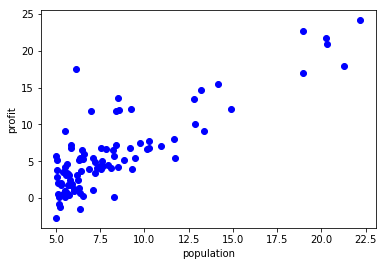

In [5]:
plt.scatter(data.population, data.profit, color='blue')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

#### Gradient Descent

In [23]:
xdata= pd.DataFrame()

In [12]:
inter= np.ones(len(data.profit))

In [27]:
xdata['i']=inter #Add bias term
xdata['population']= data['population']

In [29]:
x= np.array(xdata)
y=np.array(data['profit'])

In [98]:
iterations = 1500
alpha = 0.01
theta = np.array([0, 0])

In [115]:
def cost_func(x, y, theta):
    m= len(y)
    cost= np.sum((x.dot(theta.T)-y)**2)/2/m
    
    return cost

In [116]:
cost_func(x,y,theta)

32.072733877455676

In [133]:
def gradient_descent(x, y, theta, iterations, alpha):
    
    m= len(y)
    cost_history = [0] * iterations
    for iteration in range(iterations):
        hypothesis = x.dot(theta.T)    # 97 by 2 , 2 by 1 = 97 by 1 

        loss = hypothesis-y            # 97 by 1
        gradient = x.T.dot(loss)/m     # 2 by 97 , 97 by 1 = 2 by 1
        theta = theta - alpha*gradient # 2 by 1 
        cost = cost_func(x, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history


In [134]:
gradient= gradient_descent(x,y,theta,iterations,alpha)

In [135]:
gradient[0]

array([-3.63029144,  1.16636235])

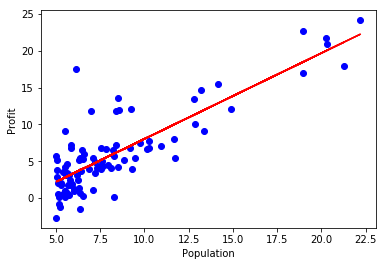

In [136]:
plt.scatter(data.population, data.profit, color='blue')
plt.plot(data.population, data.population*gradient[0][1] + gradient[0][0], '-r')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

In [138]:
xx= np.asarray(data[['population']])
yy=np.asarray(data[['profit']])

## Linear Regression using SciKit learn


In [139]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [140]:
xtrain, xtest, ytrain, ytest= train_test_split(xx, yy, test_size=0.3, random_state=4)

In [143]:
lrmodel= linear_model.LinearRegression()

In [144]:
lrmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
lrmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
print("Coef: ", lrmodel.coef_, " Intercept: ", lrmodel.intercept_ )

Coef:  [[1.15955362]]  Intercept:  [-3.58801897]


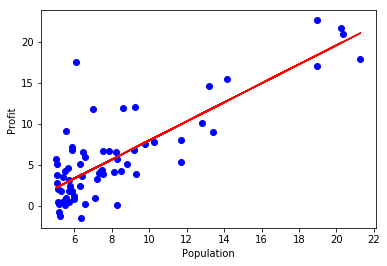

In [148]:
plt.scatter(xtrain, ytrain, color='blue')
plt.plot(xtrain, xtrain*lrmodel.coef_[0][0] + lrmodel.intercept_, '-r')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

#### Prediction on unseen data

In [149]:
prediction=lrmodel.predict(xtest)

In [150]:
print("Error by R2_Score: %.2f " % r2_score(prediction, ytest))

Error by R2_Score: 0.65 


In [153]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - ytest)))

Mean absolute error: 1.76


In [156]:
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - ytest) ** 2))

Residual sum of squares (MSE): 5.77


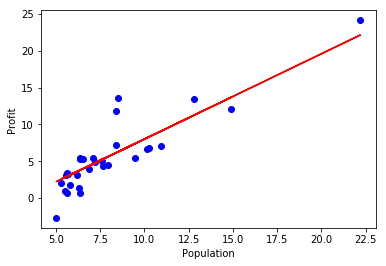

In [157]:
plt.scatter(xtest, ytest, color='blue')
plt.plot(xtest, xtest*lrmodel.coef_[0][0] + lrmodel.intercept_, '-r')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

### Linear Regression with multiple variables

In [158]:
datam = pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex1data2.txt", names=['size', 'bedrooms','price'])

In [159]:
datam.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [160]:
def normalize(x):
    normalizedx= (x- x.min())/ (x.max()-x.min())
    return normalizedx

In [161]:
datam['size']= normalize(datam['size'])
datam['price']= normalize(datam['price'])
datam['bedrooms']= normalize(datam['bedrooms'])

In [162]:
datam.head()

,size,bedrooms,price
0,0.345284,0.50,0.433962
1,0.206288,0.50,0.301887
2,0.426917,0.50,0.375660
3,0.155543,0.25,0.117170
4,0.592388,0.75,0.698113


In [180]:
datax= pd.DataFrame()
interm= np.ones(len(datam.price)) #Add bias term
datax['i']=interm
datax[['size', 'bedrooms']]= datam[['size', 'bedrooms']]

In [176]:
xm= np.asarray(datax)
ym= np.asarray(datam.price)
theta=np.array([1,1,1])
iterations=100
alpha=0.1

In [177]:
gradientm= gradient_descent(xm, ym, theta, iterations,alpha)

In [178]:
numbers=[]
for n in range(100):
    numbers.append(n)

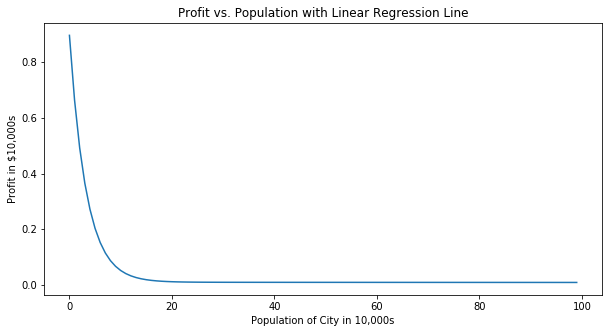

In [179]:
plt.figure(figsize=[10,5])
plt.plot(numbers, gradientm[1],'-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')
plt.show()